In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

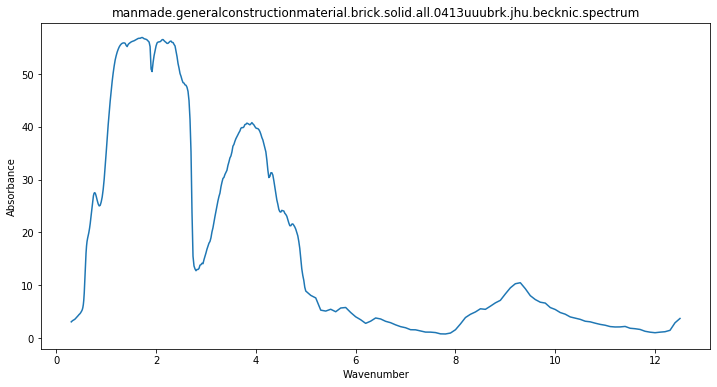

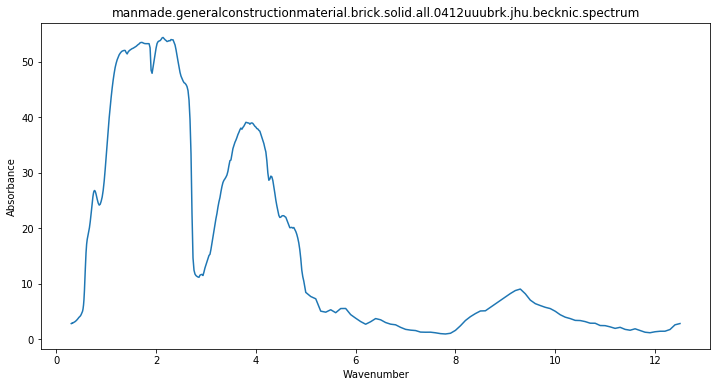

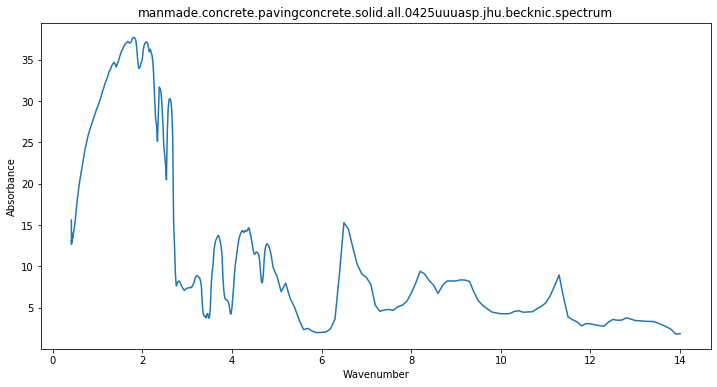

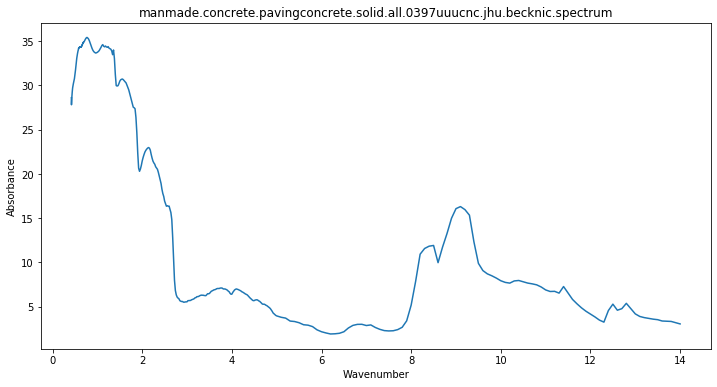

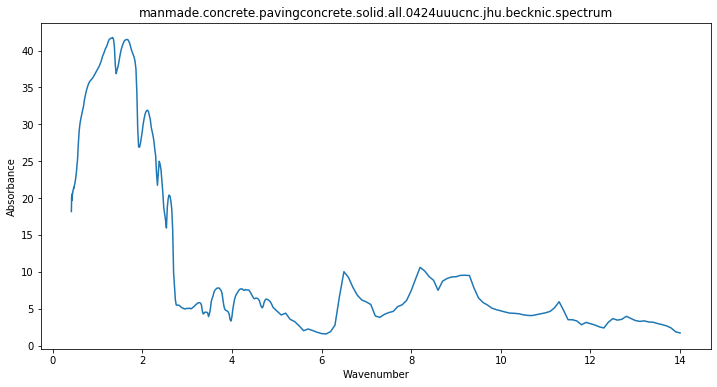

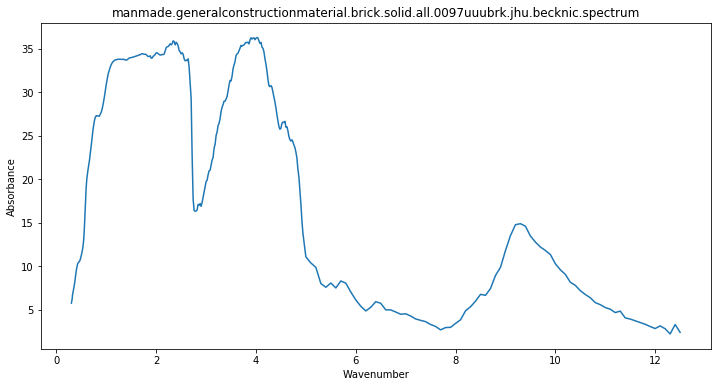

In [6]:
def plot(dataset, name):
    spectrum_path = 'nasa/' + name[:len(name) - 2] + '/'
    
    if not os.path.exists(spectrum_path):
        os.mkdir(spectrum_path)
    plt.figure(figsize=(12, 6));
    plt.plot(dataset['Wavenumber'], dataset['Absorbance'])
    plt.ylabel(dataset.columns[1])
    plt.xlabel(dataset.columns[0])
    plt.title(name)
    plt.savefig(spectrum_path + name + '.png')
    plt.show()
    
def make_nasa_data(file_path, spectrum_name):
    dataset = []
    with open(file_path, 'r') as file:
        for line in file.readlines():
            if line.count(':') == 0 and line != '\n':
                point = []
                line = line.replace(' ', '').strip('\n').split('\t')

                for entry in line:
                    point.append(float(entry))
                dataset.append(point)
    return dataset

path = '../nasa_dataset'

files = os.listdir(path)
files = [i for i in files if i.endswith('.txt')]
for file in files:
    filepath = path + '/' + file
    spectrum_name = file.split('.txt')[0]
    data = make_nasa_data(filepath, spectrum_name)
    df = pd.DataFrame(data, columns = ['Wavenumber', 'Absorbance'])  
    plot(df, spectrum_name)